In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import os

titanic_data=pd.read_csv("C:\\Users\\mnjaa\OneDrive\Desktop\\titanic_log.csv")
titanic_data.head(10)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,1
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0
5,6,3,male,NaN,0,0,8.4583,Q,0
6,7,1,male,54.0,0,0,51.8625,S,0
7,8,3,male,2.0,3,1,21.0750,S,0
8,9,3,female,27.0,0,2,11.1333,S,1
9,10,2,female,14.0,1,0,30.0708,C,1


In [24]:
os.getcwd()

'C:\\Users\\mnjaa'

In [2]:
# total number of passangers
print("# of passangers in original data: " + str(len(titanic_data.index))) # +str(len) converts the integer to string for ease of concatenation

# of passangers in original data: 891


# Analyzing data

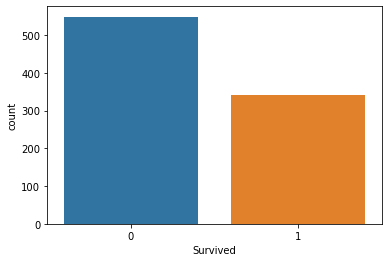

In [3]:
sns.countplot(x="Survived", data=titanic_data)

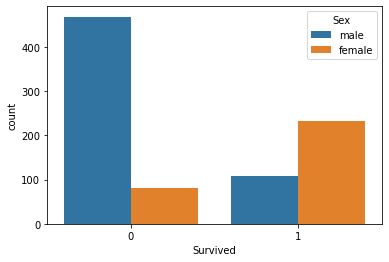

In [4]:
#survival by gender

sns.countplot(x="Survived", hue="Sex", data=titanic_data)

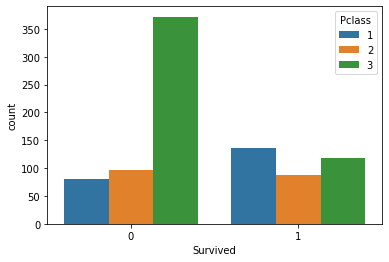

In [5]:
#survival by Class

sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

In [ ]:
#survival by Class

sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

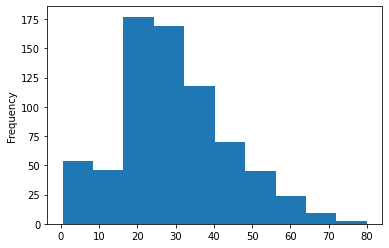

In [6]:
#visualize by age column using a histogram

titanic_data["Age"].plot.hist()

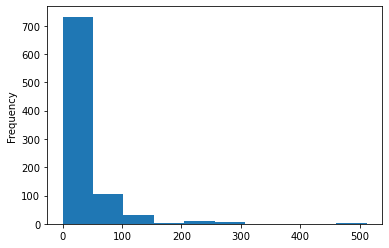

In [7]:
#visualize by Fare column using a histogram

titanic_data["Fare"].plot.hist()

In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
 8   Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


# Data Wrangling

In [9]:
titanic_data.isnull()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False


In [10]:
# sum of passangers with Nan values

titanic_data.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Survived         0
dtype: int64

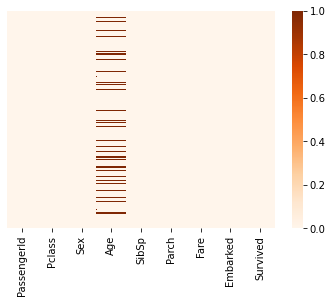

In [11]:
#plot a heatmap (to visualize correction)

sns.heatmap(titanic_data.isnull(),yticklabels=False, cmap='Oranges')

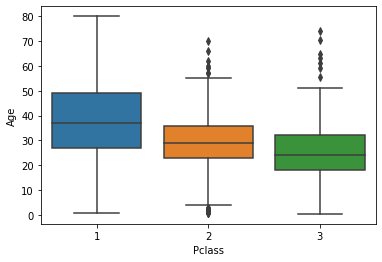

In [12]:
sns.boxplot(x="Pclass", y="Age", data=titanic_data)

In [13]:
#drop the Nan values

titanic_data.dropna(inplace=True)

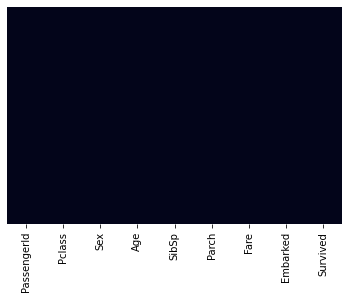

In [14]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [15]:
#check if there are remaining Nan(s)

titanic_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [16]:
titanic_data.shape

(712, 9)

In [24]:
#convert string attributes to categorical labels

sex=pd.get_dummies(titanic_data['Sex'], drop_first=True)

sex.head(5)



,male
0,1
1,0
2,0
3,0
4,1


In [25]:
embark=pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
Pcl=pd.get_dummies(titanic_data['Pclass'],drop_first=True)
Pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [27]:
#concatenate the categorically labelled rows into the dataset

titanic_data=pd.concat([titanic_data, sex, embark, Pcl], axis=1)

In [28]:
titanic_data.head(15)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,male,Q,S,2,3
0,1,3,male,22.0,1,0,7.2500,S,0,1,0,1,0,1
1,2,1,female,38.0,1,0,71.2833,C,1,0,0,0,0,0
2,3,3,female,26.0,0,0,7.9250,S,1,0,0,1,0,1
3,4,1,female,35.0,1,0,53.1000,S,1,0,0,1,0,0
4,5,3,male,35.0,0,0,8.0500,S,0,1,0,1,0,1
6,7,1,male,54.0,0,0,51.8625,S,0,1,0,1,0,0
7,8,3,male,2.0,3,1,21.0750,S,0,1,0,1,0,1
8,9,3,female,27.0,0,2,11.1333,S,1,0,0,1,0,1
9,10,2,female,14.0,1,0,30.0708,C,1,0,0,0,1,0
10,11,3,female,4.0,1,1,16.7000,S,1,0,0,1,0,1


In [29]:
# dropping unnecessary columns

titanic_data.drop(['Sex', 'Embarked', 'PassengerId', 'Pclass'], axis=1, inplace=True)

In [30]:
titanic_data.head()

,Age,SibSp,Parch,Fare,Survived,male,Q,S,2,3
0,22.0,1,0,7.2500,0,1,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,0,0,0
2,26.0,0,0,7.9250,1,0,0,1,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0
4,35.0,0,0,8.0500,0,1,0,1,0,1


# Train the data

In [31]:
# features engineering (selecting X & Y variables)


X=titanic_data.drop("Survived", axis=1)
y=titanic_data["Survived"]

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [33]:
# import the classifier, assign to a variable then fit the trained data - to teach our model the patterns between the independent & depend variables

from sklearn.tree import DecisionTreeClassifier

treemodel = DecisionTreeClassifier(criterion = 'entropy')
treemodel.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [37]:
#from sklearn.tree import DecisionTreeClassifier

help(DecisionTreeClassifier(criterion = 'entropy'))
#treemodel.fit(X_train, y_train)

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choo

In [38]:
# predicting using the set of independent variables set aside for testing & pass it through the predict model of the algorithm

predictions = treemodel.predict(X_test)

In [39]:
# classification report - used for evaluation of accuracy

from sklearn.metrics import classification_report


In [40]:
# test against your prediction / y_test = actual results

classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.78      0.77      0.77       126\n           1       0.67      0.68      0.68        88\n\n    accuracy                           0.73       214\n   macro avg       0.73      0.73      0.73       214\nweighted avg       0.73      0.73      0.73       214\n'

In [41]:
#confusion matrix

from sklearn.metrics import confusion_matrix



In [42]:
confusion_matrix(y_test, predictions)

array([[97, 29],
       [28, 60]], dtype=int64)

In [43]:
#accuracy scorey_test, predictions

#same as 102+63/102+24+25+63

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7336448598130841

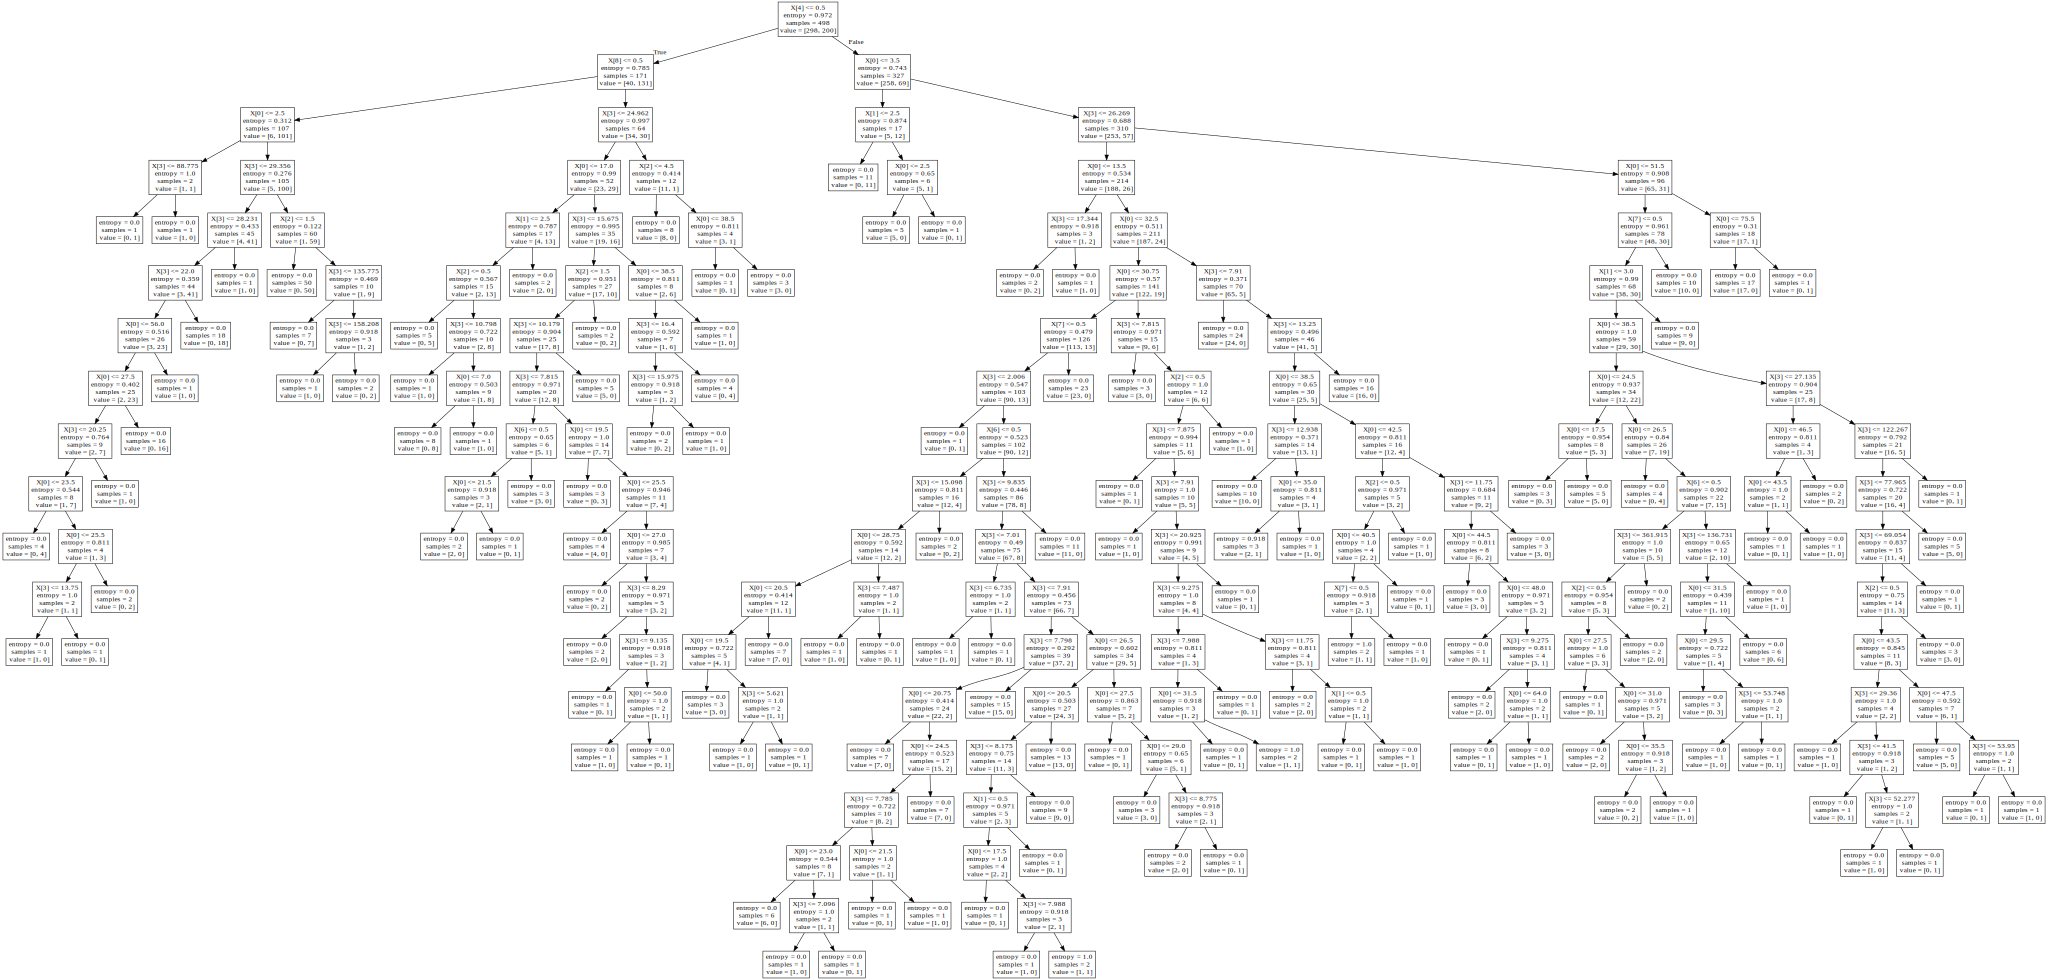

In [56]:
# plot tree
from IPython.display import Image  
from sklearn import tree
import pydotplus 
from sklearn import tree
import  graphviz

dot_data = tree.export_graphviz(treemodel, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("titanic")
graph

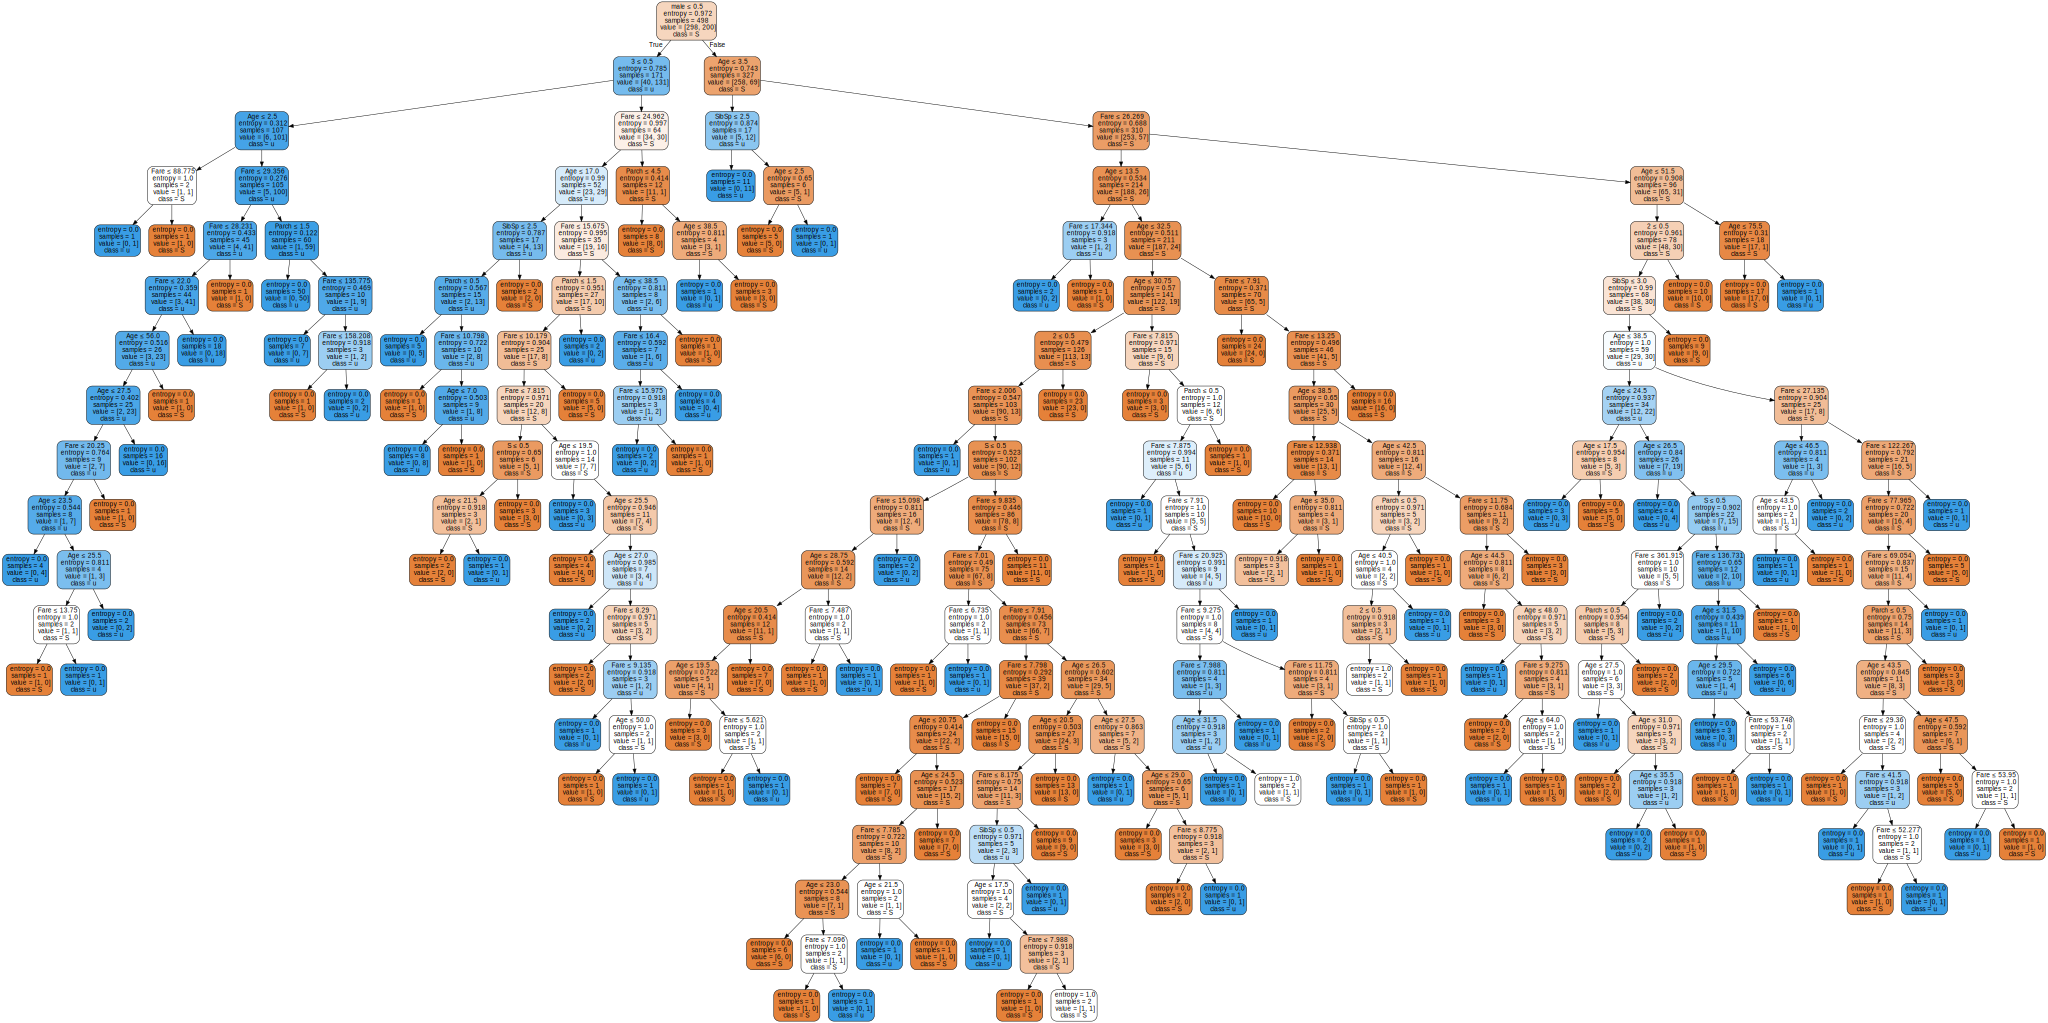

In [62]:
>>> dot_data = tree.export_graphviz(treemodel, out_file=None, 
...                      feature_names=X.columns,  
...                      class_names='Survived',  
...                      filled=True, rounded=True,  
...                      special_characters=True)  
>>> graph = graphviz.Source(dot_data)  
>>> graph 
